In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from matplotlib.patches import Circle
import os
import pickle
from scipy.stats import mannwhitneyu, ttest_ind, kruskal, f_oneway
from statannotations.Annotator import Annotator
from itertools import combinations

In [17]:
df_food_scaled = pd.read_csv('df_food_scaled.csv')

C:\Users\Sophie\AppData\Local\Temp\ipykernel_10912\4074791732.py:1: DtypeWarning: Columns (1,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_food_scaled = pd.read_csv('df_food_scaled.csv')


In [18]:
nutrient_info = {
    'folate_eaten':                                         {'unit': 'mcg', 'target': 400,  'type': 'qualifying'},
    'niacin_eaten':                                         {'unit': 'mg',  'target': 14,   'type': 'qualifying'},
    'pantothenic_acid_eaten':                               {'unit': 'mg',  'target': 5,    'type': 'qualifying'},
    'vitamin_b2_eaten':                                     {'unit': 'mg',  'target': 1.1,  'type': 'qualifying'},
    'vitamin_b1_eaten':                                     {'unit': 'mg',  'target': 1.2,  'type': 'qualifying'},
    'all_trans_retinol_equivalents_activity_eaten':         {'unit': 'IU',  'target': 700,  'type': 'qualifying'},
    'beta_carotene_eaten':                                  {'unit' : 'mcg','target' : 700, 'type' :'qualifying'},
    'vitamin_b12_eaten':                                    {'unit': 'mcg', 'target': 2.4,  'type': 'qualifying'},
    'vitamin_b6_eaten':                                     {'unit': 'mg',  'target': 1.3,  'type': 'qualifying'},
    'vitamin_c_eaten':                                      {'unit': 'mg',  'target': 75,   'type': 'qualifying'},
    'vitamin_d_eaten':                                      {'unit': 'mcg', 'target': 7.5,  'type': 'qualifying'},
    'vitamin_e_activity_eaten':                             {'unit': 'TAE', 'target': 15,    'type': 'qualifying'},
    'calcium_eaten':                                        {'unit': 'mg',  'target': 1000, 'type': 'qualifying'},
    'iron_eaten':                                           {'unit': 'mg',  'target': 18,   'type': 'qualifying'},
    'magnesium_eaten':                                      {'unit': 'mg',  'target': 320,  'type': 'qualifying'},
    'phosphorus_eaten':                                     {'unit': 'mg',  'target': 700,  'type': 'qualifying'},
    'potassium_eaten':                                      {'unit': 'mg',  'target': 4700, 'type': 'qualifying'},
    'zinc_eaten':                                           {'unit': 'mg',  'target': 8,    'type': 'qualifying'},
    'fiber_eaten':                                          {'unit': 'g',   'target': 25,   'type': 'qualifying'},
    'protein_eaten':                                        {'unit': 'g',   'target': 46,   'type': 'qualifying'},
    'fat_eaten':                                            {'unit': 'g',   'target': 78,   'type': 'disqualifying'},
    'fatty_acids_saturated_eaten':                          {'unit': 'g',   'target': 22,   'type': 'disqualifying'},
    'cholesterol_eaten':                                    {'unit': 'mg',  'target': 300,  'type': 'disqualifying'},
    'sugar_eaten':                                          {'unit': 'g',   'target': 125,  'type': 'disqualifying'},
    'sodium_eaten':                                         {'unit': 'mg',  'target': 2400, 'type': 'disqualifying'},
    'salt_eaten' :                                          {'unit' : 'g',  'target': 6,   'type': 'disqualifying'}
}


conversion_factors = {
    "mg": 1000,
    "g": 1,
    "mcg": 1000000,
    "IU": 1,
    "TAE": 1,
}

In [19]:
qualifying_nutrients = {nutr: info for nutr, info in nutrient_info.items() if info['type'] == 'qualifying'}
disqualifying_nutrients = {nutr: info for nutr, info in nutrient_info.items() if info['type'] == 'disqualifying'}

In [3]:
df_milk = df_food_scaled[df_food_scaled['food_group'] == 'milk']
df_milk.drop_duplicates('combined_name')[['combined_name', 'QI', 'DI', 'NB']].sort_values('QI', ascending=False)

,combined_name,QI,DI,NB
302464,Hafer Hauf Drink mit Leinöl,48.278325,0.831396,39.095091
293057,Alnatura - Hafer Drink Calcium,41.150444,0.865866,40.343560
303604,"Alnatura, Hafer Drink ungesüsst",40.845316,0.865866,35.599971
284370,Berief organic oat drink nature,39.774183,0.844219,30.209971
263034,Oat milk,37.316032,0.580544,26.219814
...,...,...,...,...
310839,Biedermann Bio Vegan - Heidelbeere,0.012473,1.297993,1.247327
303820,Alnatura Coconut milk,0.008735,1.952493,0.873518
283299,ADEZ nourish your potential - Chilling Coconut,0.000000,1.397507,0.000000
294706,Innocent - Kokosnuss & Reis,0.000000,0.949274,0.000000


In [11]:
high_qi_milk = df_milk[df_milk['QI'] > 4].drop_duplicates('combined_name').sort_values('QI', ascending=False)
high_qi_milk[['combined_name', 'QI', 'DI', 'NB']]

,combined_name,QI,DI,NB
302464,Hafer Hauf Drink mit Leinöl,48.278325,0.831396,39.095091
293057,Alnatura - Hafer Drink Calcium,41.150444,0.865866,40.343560
303604,"Alnatura, Hafer Drink ungesüsst",40.845316,0.865866,35.599971
284370,Berief organic oat drink nature,39.774183,0.844219,30.209971
263034,Oat milk,37.316032,0.580544,26.219814
280463,Coop : Karma : Bio Oat Drink Vegan,33.182290,0.816838,31.388744
295808,The Original OATLY Oat Drink Whole,29.391047,0.643278,52.834138
307065,Alpro Mandel Ungesüsst,9.850806,1.054223,35.000000
314389,alpro - Mandeldrink (ohne Zucker),5.447015,1.076445,35.000000


In [13]:
ratio_cols = [i for i in high_qi_milk.columns if '_ratio_scaled' in i]

df_corr = high_qi_milk[ratio_cols + ['QI']]
corr = df_corr.corr()['QI']
corr.sort_values(ascending=True)

vitamin_b12_eaten_ratio_scaled                              -0.957302
vitamin_b2_eaten_ratio_scaled                               -0.957302
vitamin_e_activity_eaten_ratio_scaled                       -0.921657
calcium_eaten_ratio_scaled                                  -0.915731
salt_eaten_ratio_scaled                                     -0.841018
protein_eaten_ratio_scaled                                  -0.723873
fat_eaten_ratio_scaled                                      -0.716851
vitamin_d_eaten_ratio_scaled                                -0.673757
fiber_eaten_ratio_scaled                                    -0.562378
fatty_acids_saturated_eaten_ratio_scaled                    -0.216805
phosphorus_eaten_ratio_scaled                                0.161132
sugar_eaten_ratio_scaled                                     0.754168
magnesium_eaten_ratio_scaled                                 0.995657
potassium_eaten_ratio_scaled                                 0.995657
pantothenic_acid_eat

In [14]:
def compute_index(row, nutrient_cols, scaling_factor=2000) :

    index = 0
    ratio_sum = 0

    for nutr in nutrient_cols :
        ratio_sum += row[nutr + '_ratio']

    index = (scaling_factor / row['energy_kcal_eaten']) * (ratio_sum / len(nutrient_cols))
    return index

In [15]:
def compute_qi_excluding(row, nutrient_list, exclude=None, scaling_factor=2000):
    if exclude is not None:
        new_list = [nutr for nutr in nutrient_list if nutr != exclude]
    else:
        new_list = nutrient_list
    

    return compute_index(row, new_list, scaling_factor=scaling_factor)

In [21]:
def compare_qi_excluding_nutrient(df, nutrient_to_exclude, qualifying_nutrients, new_col_name=None,scaling_factor=2000):


    if new_col_name is None:
        new_col_name = f"QI_excl_{nutrient_to_exclude}"


    df[new_col_name] = df.apply(lambda row: compute_qi_excluding(row, qualifying_nutrients, exclude=nutrient_to_exclude, scaling_factor=scaling_factor), axis=1)

 
    df_plot = df.drop_duplicates('combined_name').copy()
    df_plot = df_plot[['combined_name', 'QI', new_col_name]]

    labels = df_plot['combined_name'].tolist()
    x = np.arange(len(labels))
    width = 0.35


    plt.figure(figsize=(16, 8))
    plt.bar(x - width/2, df_plot['QI'], width, label='QI (incl. ' + nutrient_to_exclude + ')', color='skyblue')
    plt.bar(x + width/2, df_plot[new_col_name], width, label=f"QI (excl. {nutrient_to_exclude})", color='deeppink')

    plt.xlabel('Food Item')
    plt.ylabel('QI Value')
    plt.title(f"Comparison of QI with and without {nutrient_to_exclude}")
    plt.xticks(x, labels, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_plot['QI_diff'] = df_plot['QI'] - df_plot[new_col_name]
    df_plot['QI_pct_change'] = (df_plot['QI_diff'] / df_plot['QI']) * 100

    return df_plot

## Pantothenic acid

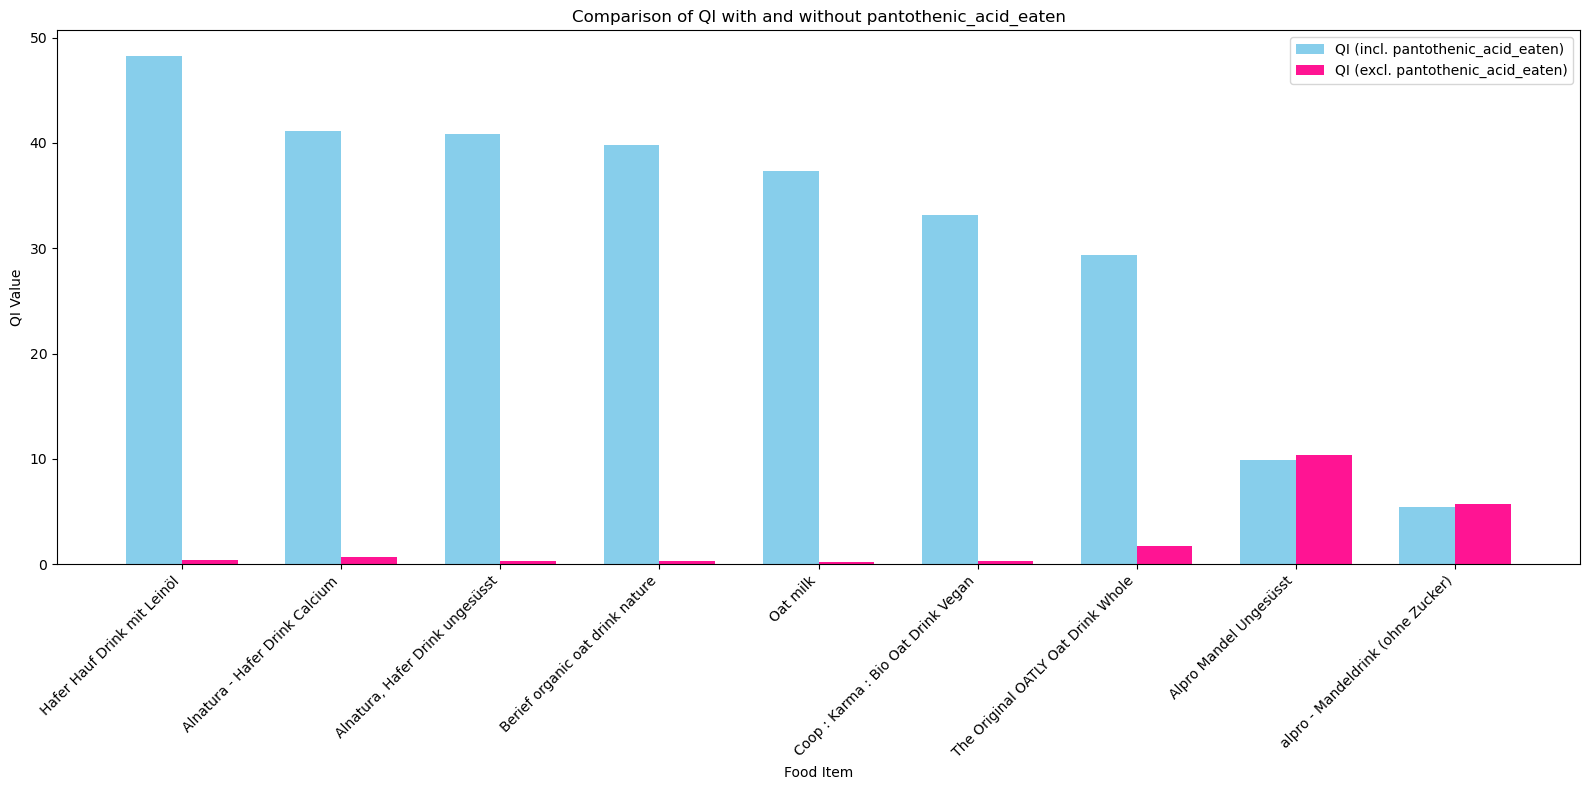

,combined_name,QI,QI_excl_pantothenic_acid_eaten,QI_diff,QI_pct_change
302464,Hafer Hauf Drink mit Leinöl,48.278325,0.420565,47.857760,99.128874
293057,Alnatura - Hafer Drink Calcium,41.150444,0.671183,40.479261,98.368954
303604,"Alnatura, Hafer Drink ungesüsst",40.845316,0.349995,40.495321,99.143120
284370,Berief organic oat drink nature,39.774183,0.288614,39.485569,99.274369
263034,Oat milk,37.316032,0.238769,37.077263,99.360144
280463,Coop : Karma : Bio Oat Drink Vegan,33.182290,0.279604,32.902686,99.157371
295808,The Original OATLY Oat Drink Whole,29.391047,1.759736,27.631311,94.012680
307065,Alpro Mandel Ungesüsst,9.850806,10.369269,-0.518463,-5.263158
314389,alpro - Mandeldrink (ohne Zucker),5.447015,5.733700,-0.286685,-5.263158


In [29]:
df_milk_pantothenic_acid = compare_qi_excluding_nutrient(df=high_qi_milk, nutrient_to_exclude='pantothenic_acid_eaten', qualifying_nutrients=qualifying_nutrients)

df_milk_pantothenic_acid

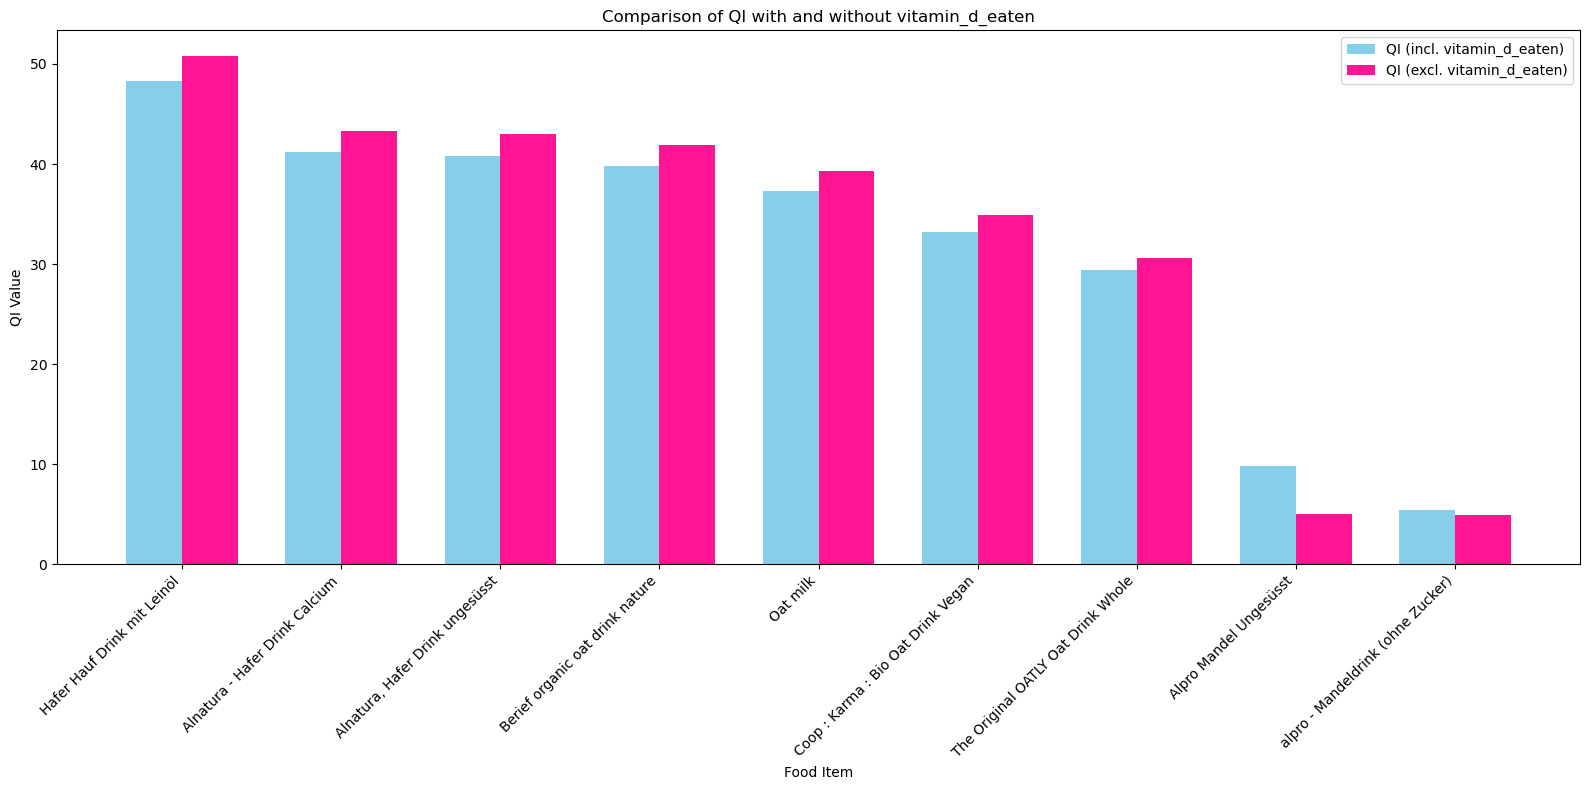

,combined_name,QI,QI_excl_vitamin_d_eaten,QI_diff,QI_pct_change
302464,Hafer Hauf Drink mit Leinöl,48.278325,50.819289,-2.540964,-5.263158
293057,Alnatura - Hafer Drink Calcium,41.150444,43.316257,-2.165813,-5.263158
303604,"Alnatura, Hafer Drink ungesüsst",40.845316,42.995069,-2.149753,-5.263158
284370,Berief organic oat drink nature,39.774183,41.867561,-2.093378,-5.263158
263034,Oat milk,37.316032,39.280034,-1.964002,-5.263158
280463,Coop : Karma : Bio Oat Drink Vegan,33.182290,34.928727,-1.746436,-5.263158
295808,The Original OATLY Oat Drink Whole,29.391047,30.568600,-1.177553,-4.006502
307065,Alpro Mandel Ungesüsst,9.850806,4.971159,4.879647,49.535514
314389,alpro - Mandeldrink (ohne Zucker),5.447015,4.923984,0.523032,9.602168


In [40]:
df_milk_vitamin_d = compare_qi_excluding_nutrient(df=high_qi_milk, nutrient_to_exclude='vitamin_d_eaten', qualifying_nutrients=qualifying_nutrients)

df_milk_vitamin_d